TP2 : **Réseau des neurones** Montassar Kefi 3IDL-G2

In [14]:
# Import des bibliothèques

# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
# SeaBorn : librairie de graphiques avancés

import numpy as np                # Tableaux numériques
import pandas as pd               # Tables de données
import seaborn as sns; sns.set(style="ticks", color_codes=True)  # Visualization
import matplotlib.pyplot as plt   # Visualization

from sklearn.model_selection import train_test_split

# Configuration intégration dans Jupyter
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline


In [6]:
#Q1 
url="https://drive.google.com/file/d/1lCrldn-uT1K6ctUC2xt7-hMjbMZ9Ft9r/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, index_col="Id")
 


In [9]:
#Q2
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [11]:
#Q3
print(df.shape)

(150, 5)


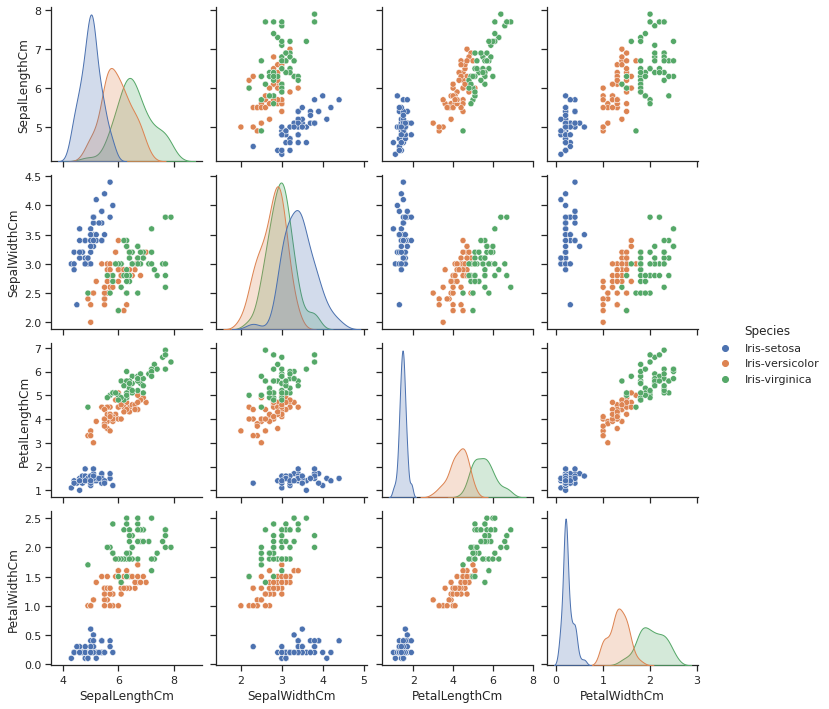

In [15]:
#Q4
sns.pairplot(df, hue='Species', height=2.5);

In [16]:
#Q5
df[df["Species"]=='Iris-setosa']=0
df[df["Species"]=='Iris-versicolor']=1
df[df["Species"]=='Iris-virginica']=2

In [17]:
#Q6
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0


In [19]:
#Q7

# print(df.columns)
X = df.iloc[:,:-1]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [20]:
#Q8
# printing out train and test sets
 
print('X_train : ')
print(X_train.head(10))
print(X_train.shape)
 
print('')
print('X_test : ')
print(X_test.head(10))
print(X_test.shape)
 
print('')
print('y_train : ')
print(y_train.head(10))
print(y_train.shape)
 
print('')
print('y_test : ')
print(y_test.head(10))
print(y_test.shape)

X_train : 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
97             1.0           1.0            1.0           1.0
106            2.0           2.0            2.0           2.0
67             1.0           1.0            1.0           1.0
1              0.0           0.0            0.0           0.0
123            2.0           2.0            2.0           2.0
68             1.0           1.0            1.0           1.0
29             0.0           0.0            0.0           0.0
41             0.0           0.0            0.0           0.0
45             0.0           0.0            0.0           0.0
61             1.0           1.0            1.0           1.0
(100, 4)

X_test : 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
74             1.0           1.0            1.0           1.0
19             0.0           0.0       

In [21]:
#Q9
from sklearn.neural_network import MLPClassifier
TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150).fit(X_train.astype('int'), y_train.astype('int'))
predModel=TrainModel.predict(X_test.astype('int'))
predModel

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [22]:
#Q10
from sklearn import metrics 
metrics.accuracy_score(y_test.astype('int'),predModel)

1.0

In [23]:
#Q11
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
metrics.confusion_matrix(y_test.astype('int'),predModel)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

In [ ]:
#Q12
#Une Confusion Matrix (matrice de confusion) ou tableau de contingence est un outil permettant de mesurer les performances d’un modèle de Machine Learning en vérifiant notamment à quelle fréquence ses prédictions sont exactes par rapport à la réalité dans des problèmes de classification,

#L'axe des x présente les valeurs prédite et des Y présente les valeurs réelles. Les valeurs (pour les X et les Y ) sont ordonnées respectivement:Setosa ,Versicolor et Virginica. D'après la matrice de confusion => 19 valeurs classées comme Setosa sont en réalité Virginica, et 16 comme Virginica mais elles sont Setosa et les 15 autres sont bien classées .



In [24]:
#Q13
TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150,learning_rate_init=0.7).fit(X_train.astype('int'), y_train.astype('int'))
predModel=TrainModel.predict(X_test.astype('int'))
predModel

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

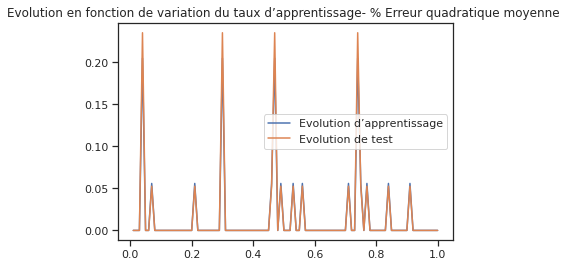

In [25]:
#Q14
loss_values=[]
listLR=[]
Trainloss_values=[]
for lR in range(1,101):
  TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150,learning_rate_init=lR/100).fit(X_train.astype('int'), y_train.astype('int'))
  #évolution d’apprentissage
  TrainpredModel=TrainModel.predict(X_train.astype('int'))
  Trainloss_values.append(metrics.mean_squared_log_error(y_train.astype('int'),TrainpredModel))
  #évolution de test
  predModel=TrainModel.predict(X_test.astype('int'))
  loss_values.append(metrics.mean_squared_log_error(y_test.astype('int'),predModel))
  listLR.append(lR/100)
plt.plot(listLR,Trainloss_values,label="Evolution d’apprentissage")
plt.plot(listLR,loss_values,label="Evolution de test")
plt.legend()
plt.title('Evolution en fonction de variation du taux d’apprentissage- % Erreur quadratique moyenne ')
plt.show()

In [44]:
#Q15

TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=1500).fit(X_train.astype('int'), y_train.astype('int'))

TrainpredModel=TrainModel.predict(X_train.astype('int'))
metrics.accuracy_score(y_train.astype('int'),TrainpredModel)

predModel=TrainModel.predict(X_test.astype('int'))
metrics.accuracy_score(y_test.astype('int'),predModel)



0.3

In [45]:
#Q16
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN
Seqmodel = Sequential()
Seqmodel.add(Dense(len(X_train.columns),input_shape=(len(X_train.columns),),activation='relu'))
Seqmodel.add(Dense(1,activation='softmax'))
Seqmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model = Seqmodel.fit(X_train.astype('int'), y_train.astype('int'))



4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - acc: 0.3500


In [42]:
#Q17

Seqmodel = SimpleRNN(len(X_train.columns),return_sequences=True, return_state=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train.astype('float'), y_train.astype('float'))
